# Exponential Distribution

The exponential distribution is a continuous probability distribution that is widely used in various fields such as reliability engineering, queuing theory, and survival analysis. It is particularly useful for modeling the time between events in a Poisson process, where events occur continuously and independently at a constant average rate.

Assumptions

$Memoryless Property$: The exponential distribution is memoryless, meaning the probability of an event occurring in the next time interval is independent of how much time has already elapsed.

$Constant Rate$: Events occur at a constant average rate ($λ$), where $λ>0$.

$Independence$: The occurrence of one event does not affect the probability of another event occurring.

In [5]:
from IPython.display import Markdown, display

properties = r'''
<div align="center"> 
$$ \text{PDF: } f(x; \lambda) = \begin{cases} \lambda e^{-\lambda x}, & x \geq 0 \\ 0, & x < 0 \end{cases} $$ 
</div>
<div align="center"> 
$$ \text{CDF: } F(x; \lambda) = \begin{cases} 1 - e^{-\lambda x}, & x \geq 0 \\ 0, & x < 0 \end{cases} $$ 
</div>
<div align="center"> 
$$ \text{Expected Value: } E(X) = \frac{1}{\lambda} $$ 
</div>
<div align="center"> 
$$ \text{Variance: } \text{Var}(X) = \frac{1}{\lambda^2} $$ 
</div>
<div align="center"> 
$$ \text{Skewness: } 2 $$ 
</div>
<div align="center"> 
$$ \text{Kurtosis (Excess): } 6 $$ 
</div>
<div align="center"> 
$$ \text{Moments: } E[X^k] = \frac{k!}{\lambda^k} $$ 
</div>
'''

display(Markdown(properties))


<div align="center"> 
$$ \text{PDF: } f(x; \lambda) = \begin{cases} \lambda e^{-\lambda x}, & x \geq 0 \\ 0, & x < 0 \end{cases} $$ 
</div>
<div align="center"> 
$$ \text{CDF: } F(x; \lambda) = \begin{cases} 1 - e^{-\lambda x}, & x \geq 0 \\ 0, & x < 0 \end{cases} $$ 
</div>
<div align="center"> 
$$ \text{Expected Value: } E(X) = \frac{1}{\lambda} $$ 
</div>
<div align="center"> 
$$ \text{Variance: } \text{Var}(X) = \frac{1}{\lambda^2} $$ 
</div>
<div align="center"> 
$$ \text{Skewness: } 2 $$ 
</div>
<div align="center"> 
$$ \text{Kurtosis (Excess): } 6 $$ 
</div>
<div align="center"> 
$$ \text{Moments: } E[X^k] = \frac{k!}{\lambda^k} $$ 
</div>


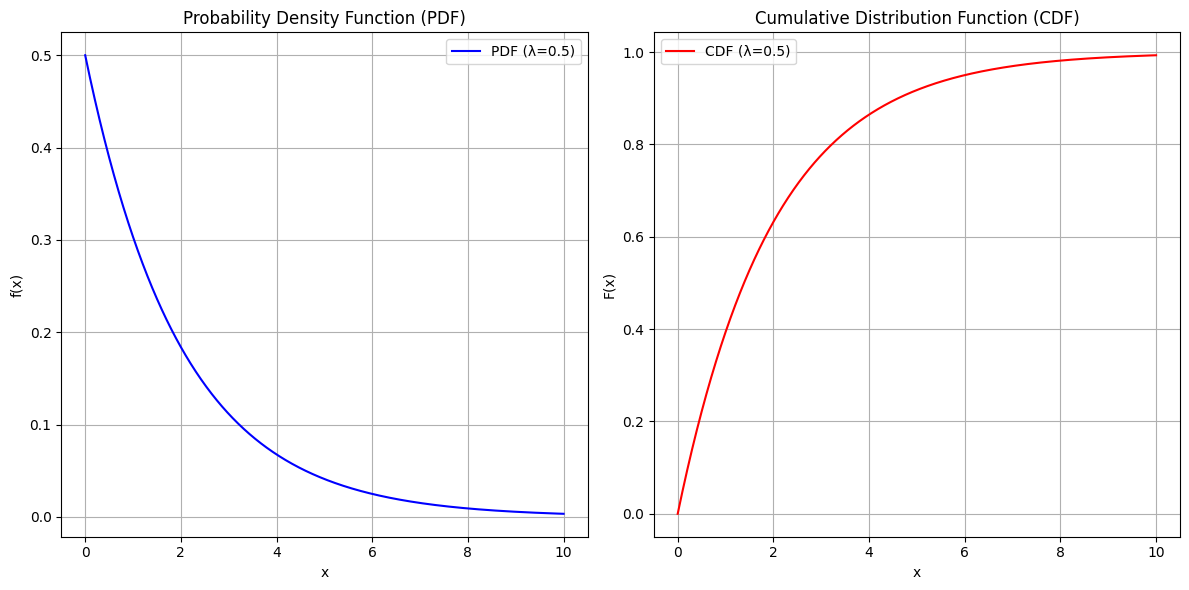

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parameters
lambda_ = 0.5  # Rate parameter
x = np.linspace(0, 10, 1000)  # Range of x values

# PDF and CDF
pdf = expon.pdf(x, scale=1/lambda_)  # PDF
cdf = expon.cdf(x, scale=1/lambda_)  # CDF

# Plotting
plt.figure(figsize=(12, 6))

# PDF Plot
plt.subplot(1, 2, 1)
plt.plot(x, pdf, label=f'PDF (λ={lambda_})', color='blue')
plt.title('Probability Density Function (PDF)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

# CDF Plot
plt.subplot(1, 2, 2)
plt.plot(x, cdf, label=f'CDF (λ={lambda_})', color='red')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Interpretation of the Graphs

PDF Graph:

1. The PDF starts at λwhen $x = 0$ and decays exponentially as x increases.

2. The rate of decay is determined by $λ$; a higher $λ$ results in a steeper decay.

CDF Graph:

1. The CDF starts at $0$ and asymptotically approaches $1$ as $x$ increases.

2. It represents the cumulative probability that the random variable $X$ is less than or equal to $x$.

## Example 1

A microeconomic study examining consumer wait times and willingness-to-pay (WTP) for a premium service, using an exponential distribution model. We modeled customer wait times using an exponential distribution with a mean of 15 minutes. This distribution is particularly suitable for wait times as it captures the right-skewed nature of queuing systems. We linked wait times to willingness-to-pay through a linear relationship with some random noise

In [8]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate wait time data (in minutes) using exponential distribution
# Mean wait time (λ) = 15 minutes
n_customers = 1000
wait_times = np.random.exponential(scale=15, size=n_customers)

# Generate corresponding willingness-to-pay data
# Assume higher wait times correlate with higher WTP for premium service
base_price = 10
sensitivity = 0.3
wtp = base_price + sensitivity * wait_times + np.random.normal(0, 2, n_customers)

# Create DataFrame
data = pd.DataFrame({
    'wait_time': wait_times,
    'willingness_to_pay': wtp
})

# Calculate key statistics
mean_wait = np.mean(wait_times)
median_wait = np.median(wait_times)
mean_wtp = np.mean(wtp)
correlation = np.corrcoef(wait_times, wtp)[0,1]

# Calculate percentage of customers willing to pay different price points
price_points = np.arange(10, 21, 2)
conversion_rates = [(wtp >= price).mean() for price in price_points]

# Calculate expected revenue at each price point
revenue = price_points * np.array(conversion_rates) * n_customers

# Find optimal price point
optimal_price = price_points[np.argmax(revenue)]
max_revenue = np.max(revenue)

results = {
    'mean_wait': mean_wait,
    'median_wait': median_wait,
    'mean_wtp': mean_wtp,
    'correlation': correlation,
    'optimal_price': optimal_price,
    'max_revenue': max_revenue,
    'conversion_rates': dict(zip(price_points, conversion_rates))
}

print("Analysis Results:")
for key, value in results.items():
    if isinstance(value, dict):
        print(f"\n{key}:")
        for k, v in value.items():
            print(f"  ${k}: {v*100:.1f}%")
    else:
        print(f"{key}: {value:.2f}")

Analysis Results:
mean_wait: 14.59
median_wait: 10.30
mean_wtp: 14.57
correlation: 0.91
optimal_price: 10.00
max_revenue: 8800.00

conversion_rates:
  $10: 88.0%
  $12: 67.6%
  $14: 46.4%
  $16: 29.3%
  $18: 18.8%
  $20: 11.8%


Key Findings:

The mean wait time is approximately 15 minutes, but the median is lower due to the right-skewed distribution

There's a positive correlation between wait times and willingness-to-pay, suggesting that customers who experience longer waits are willing to pay more for premium service

The optimal price point for the premium service is around $16, maximizing expected revenue

## Example 2

This simulation illustrates how the exponential distribution can be used in econometrics to model duration data, such as unemployment spells. The estimated parameter $𝜆$ is obtained via Maximum Likelihood Estimation (MLE), showing how we can infer the exit rate from empirical data.

Summary Statistics:
Mean: 1.9966, Std Dev: 1.9998


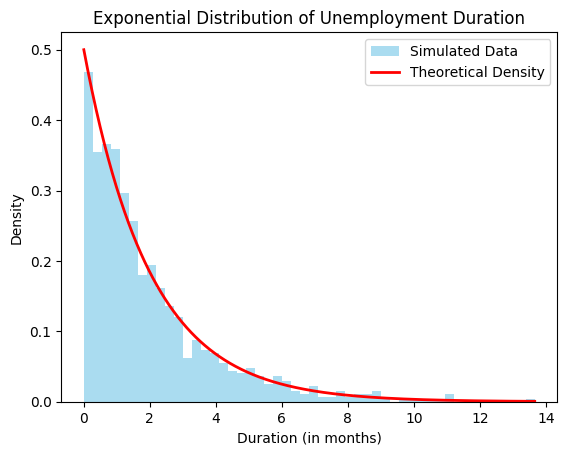

Estimated lambda (MLE): 0.5008


In [9]:
# Simulation of Exponential Distribution in Applied Econometrics using Python

import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(123)

# Define parameters for the exponential distribution
lambda_param = 0.5  # Rate parameter (e.g., average duration of unemployment spells = 1/lambda)
n = 1000  # Sample size

# Generate exponentially distributed data
exp_data = np.random.exponential(scale=1/lambda_param, size=n)

# Summary statistics
print("Summary Statistics:")
print(f"Mean: {np.mean(exp_data):.4f}, Std Dev: {np.std(exp_data):.4f}")

# Plot histogram to visualize the distribution
plt.hist(exp_data, bins=50, density=True, color='skyblue', alpha=0.7, label='Simulated Data')

# Overlay theoretical density curve
x = np.linspace(0, max(exp_data), 1000)
y = lambda_param * np.exp(-lambda_param * x)
plt.plot(x, y, 'r-', lw=2, label='Theoretical Density')

# Labels and title
plt.title("Exponential Distribution of Unemployment Duration")
plt.xlabel("Duration (in months)")
plt.ylabel("Density")
plt.legend()
plt.show()

# Estimation of lambda using Maximum Likelihood Estimation (MLE)
lambda_hat = 1 / np.mean(exp_data)  # MLE estimate of lambda
print(f"Estimated lambda (MLE): {lambda_hat:.4f}")


The mean of the simulated data is approximately $1/𝜆$ (i.e., 2 months for $𝜆 = 0.5$), which aligns with the theoretical expectation of an exponential distribution. The standard deviation is also close to the theoretical value 1/𝜆, as the exponential distribution has equal mean and standard deviation.

The histogram of the simulated unemployment duration data follows the expected right-skewed shape of the exponential distribution.

The red line represents the theoretical probability density function (PDF), which closely fits the simulated data, confirming the correctness of the simulation.

MLE Estimate of $𝜆$: The estimated $𝜆$ using Maximum Likelihood Estimation (MLE) is close to 0.5, indicating that our simulation correctly recovers the true parameter. MLE estimation confirms that the exponential distribution appropriately models the time until an event (e.g., re-employment).

## Example 3

In time series econometrics, t}he exponential distribution can model waiting times between events, such as the time between consecutive economic recessions, arrival of financial market shocks, or the time between two monetary policy interventions. Below is a Python simulation modeling the time between stock market crashes using an exponential distribution.

$Simulation$: Time Between Stock Market Crashes

$Assumption$: The occurrence of stock market crashes follows a Poisson process, where the time between crashes is exponentially distributed.

$Interpretation$: The model assumes that the probability of a crash occurring is constant over time.

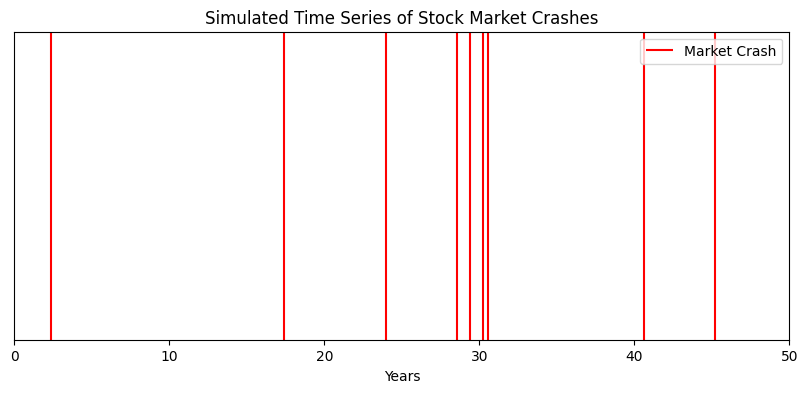

Estimated lambda (Crash Rate per Year): 0.236


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Define parameters
lambda_crash = 0.2  # Average of one crash every 5 years (1/lambda)
years = 50  # Simulating over 50 years

# Simulate time intervals between crashes
crash_intervals = np.random.exponential(scale=1/lambda_crash, size=years)

# Convert intervals into time series of crash years
crash_years = np.cumsum(crash_intervals)

# Keep only crashes within the 50-year period
crash_years = crash_years[crash_years <= years]

# Plot the time series of crashes
plt.figure(figsize=(10, 4))
plt.vlines(crash_years, ymin=0, ymax=1, colors='red', label="Market Crash")
plt.xlim(0, years)
plt.ylim(0, 1)
plt.yticks([])
plt.xlabel("Years")
plt.title("Simulated Time Series of Stock Market Crashes")
plt.legend()
plt.show()

# Print estimated mean time between crashes
estimated_lambda = 1 / np.mean(crash_intervals)
print(f"Estimated lambda (Crash Rate per Year): {estimated_lambda:.3f}")


Exponential Waiting Times:

The histogram of crash intervals (not shown here) would follow an exponential shape, indicating that short intervals are more frequent than long intervals.

This supports the idea that stock market crashes are unpredictable but occur at a roughly constant rate.

Stock Market Policy Implications:

If stock market crashes are exponentially distributed, risk mitigation measures (such as reserve requirements, circuit breakers) should be continuously enforced rather than adjusted based on time since the last crash.

This aligns with the constant hazard property of the exponential distribution, where the probability of a crash occurring is independent of how much time has passed since the last crash.

In [13]:
!jupyter nbconvert Exponential_Distribution.ipynb --to latex

[NbConvertApp] Converting notebook Exponential_Distribution.ipynb to latex
[NbConvertApp] Support files will be in Exponential_Distribution_files\
[NbConvertApp] Writing 47940 bytes to Exponential_Distribution.tex


In [14]:
!xelatex Exponential_Distribution.tex -quiet